# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

previsao = pd.read_csv("previsao_de_renda.csv")
display(previsao)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
numericas = ['idade', 'tempo_emprego', 'renda', 'qtd_filhos']
previsao[numericas].corr()

,idade,tempo_emprego,renda,qtd_filhos
idade,1.000000,0.323934,0.042570,-0.364303
tempo_emprego,0.323934,1.000000,0.394235,-0.074250
renda,0.042570,0.394235,1.000000,0.009567
qtd_filhos,-0.364303,-0.074250,0.009567,1.000000


C:\Users\lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


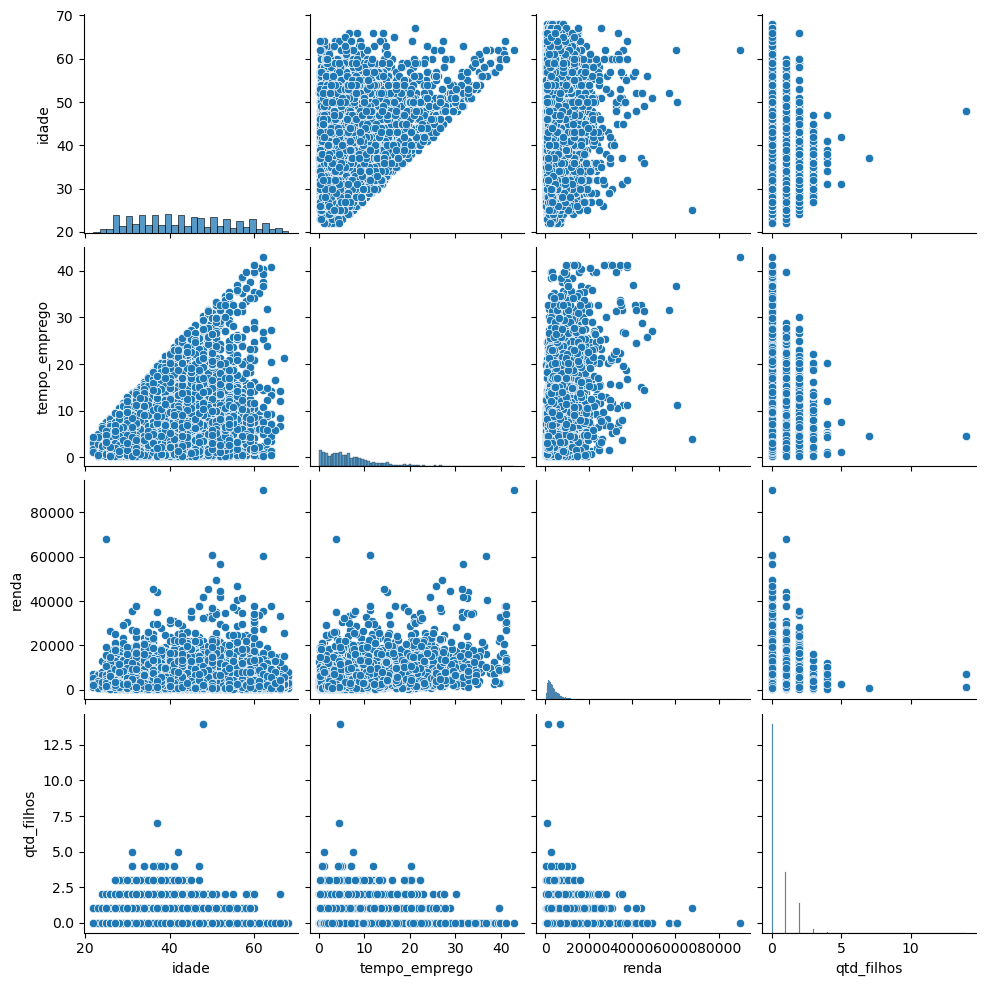

In [10]:
sns.pairplot(previsao[numericas])

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

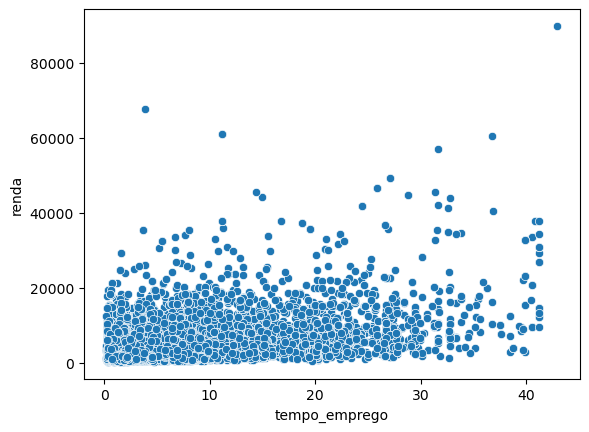

In [4]:
sns.scatterplot(data=previsao, x='tempo_emprego', y='renda')

<Axes: xlabel='idade', ylabel='renda'>

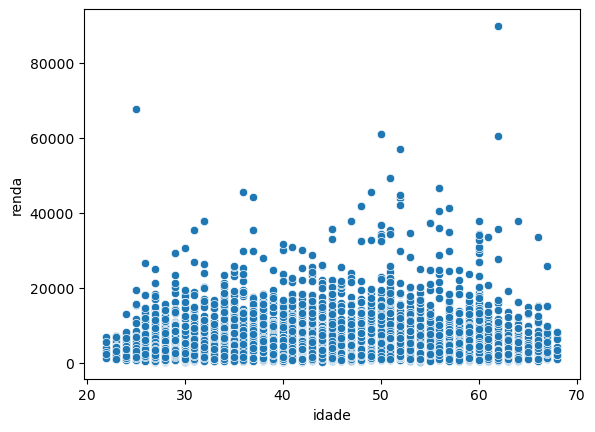

In [6]:
sns.scatterplot(data=previsao, x='idade', y='renda')

In [ ]:
# Nenhuma das variáveis possui alta correlação com a renda, a que possui maior (tempo de emprego) está em torno de 32%.

3) Na su aopinião, há outliers na variável renda?

In [ ]:
# Com certeza há alguns outliers, sendo valores de renda muito maiores que a média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [16]:
previsao_log = previsao.copy()
previsao_log['log_renda'] = np.log(previsao_log['renda'])
numericas_log = ['idade', 'tempo_emprego', 'log_renda', 'qtd_filhos']

In [17]:
previsao_log[numericas_log].corr()

,idade,tempo_emprego,log_renda,qtd_filhos
idade,1.000000,0.323934,0.024712,-0.364303
tempo_emprego,0.323934,1.000000,0.379556,-0.074250
log_renda,0.024712,0.379556,1.000000,0.023743
qtd_filhos,-0.364303,-0.074250,0.023743,1.000000


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

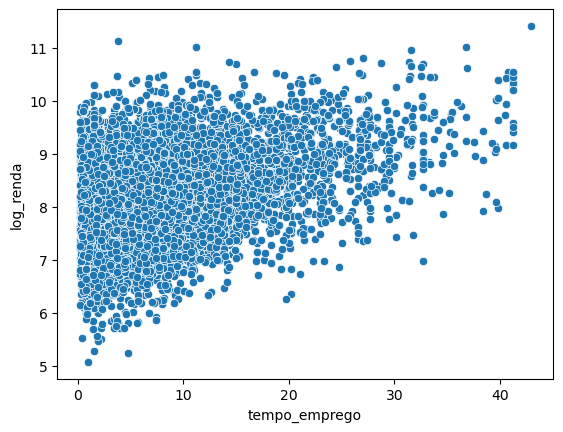

In [18]:
sns.scatterplot(data=previsao_log, x='tempo_emprego', y='log_renda')

C:\Users\lucia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


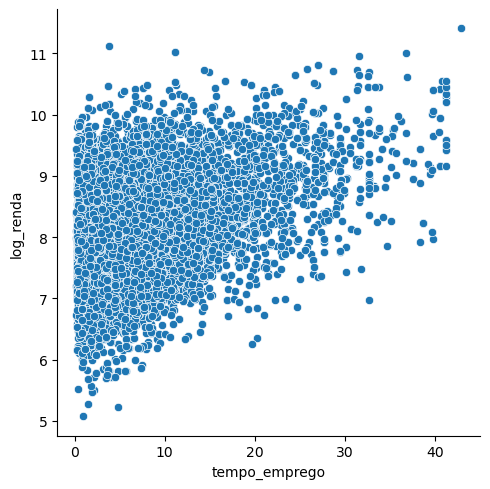

In [19]:
sns.relplot(data=previsao_log, x='tempo_emprego', y='log_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# Melhorou mas não muito. A correlação não é alta o suficiente.